In [1]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import librosa
from google.colab import drive
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import pandas as pd

from tqdm import tqdm

import IPython.display

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


Small EDA of one signal

In [5]:
song_path = '/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20190128-145230-45be2b1a85adc726-chest03.wav'

In [6]:
signal,sample_rate = librosa.load(song_path)


In [7]:
signal

array([ 5.85282396e-05,  1.18588883e-04,  1.92790190e-04, ...,
       -1.14588905e-02, -8.25630128e-03, -4.04791813e-03], dtype=float32)

In [8]:
signal.shape


(295911,)

In [9]:
IPython.display.Audio(signal, rate=sample_rate)

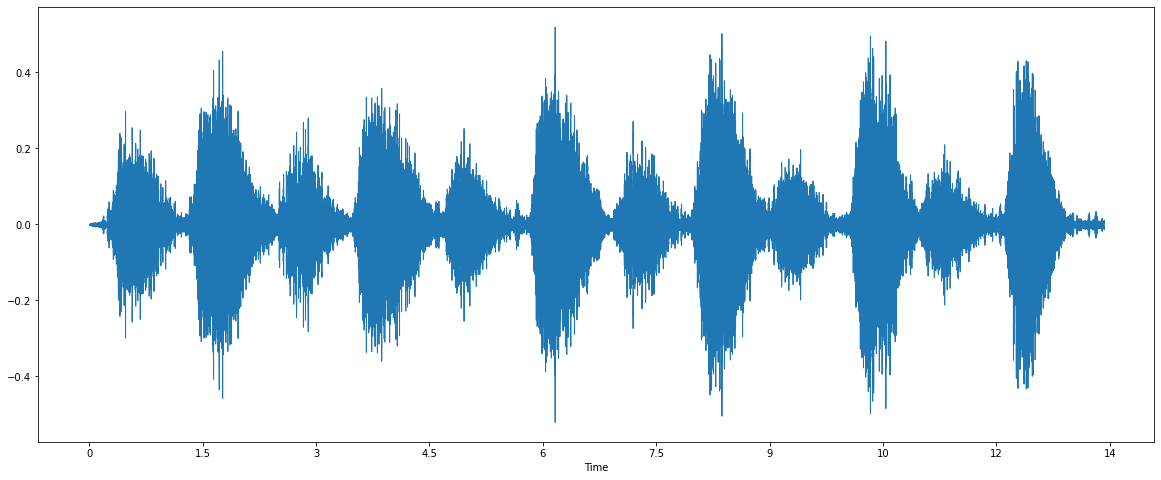

In [10]:
plt.figure(figsize = (20,8))
librosa.display.waveshow(signal,sr=sample_rate)
plt.show();

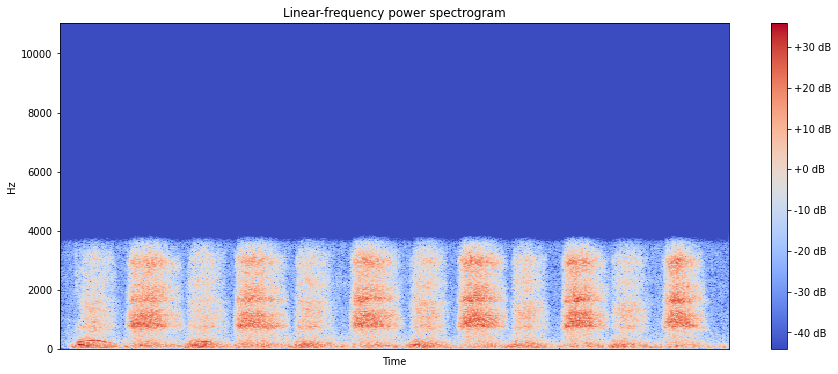

In [11]:
# Plot spectogram
plt.figure(figsize=(15, 6))
decibels = librosa.amplitude_to_db(np.abs(librosa.stft(signal)))
# amplitude_to_db converts an amplitude spectrogram to dB-scaled spectrogram
librosa.display.specshow(decibels, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.title('Linear-frequency power spectrogram')
plt.show()

In [12]:
mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
mfccs.shape

(20, 578)

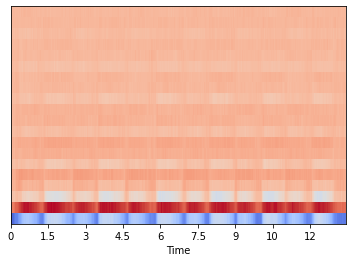

In [13]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time');

In [14]:
mfccs = preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-1.6499556e-09  1.3199645e-08 -1.1549689e-08  1.3199645e-08
  1.3199645e-08 -6.5998225e-09  1.3199645e-08  4.9498667e-09
 -1.3199645e-08 -4.9498667e-09  6.5998225e-09 -1.3199645e-08
  0.0000000e+00  6.5998225e-09 -1.3199645e-08 -3.2999112e-09
 -6.5998225e-09 -3.2999112e-09 -6.5998225e-09  0.0000000e+00]
[1.         1.0000001  1.         1.         1.0000001  1.
 1.0000001  1.0000001  1.0000001  1.0000001  1.         1.
 1.         1.0000001  1.0000002  1.         1.         0.9999999
 1.         0.99999976]


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


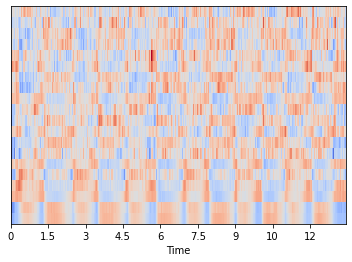

In [15]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time');

In [16]:
mfccs.T.shape # this will be input

(578, 20)

In [17]:
df_files = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/selected_records.csv')

This is dataframe with all links to files

In [18]:
df_files.shape

(1762, 12)

In [19]:
df_files.sample(5)

,Unnamed: 0,id,path,point,time,model,label,duration,rec_id,n_seg,length,predicted_label
168,1366,448bed3e742fa94f,./audio_files/20190912-161215-448bed3e742fa94f...,chest01,20190912-161215,HUAWEI ANE-LX1 | 8.0.0,normal,18.560,448bed3e742fa94f_chest01,1,18.374240,True
841,2521,159fb9bc0125ec8d,./audio_files/20210705-110527-159fb9bc0125ec8d...,spine03,20210705-110527,Xiaomi Redmi Note 9 Pro | 10,problems,3.328,159fb9bc0125ec8d_spine03,1,3.072608,True
1088,2830,297cfbbcc95f1193,./audio_files/20210713-160900-297cfbbcc95f1193...,spine02,20210713-160900,Xiaomi Redmi Note 9 Pro | 10,normal,4.992,297cfbbcc95f1193_spine02,1,4.736599,True
54,1250,a2ca3ce9c78b5993,./audio_files/20190817-114816-a2ca3ce9c78b5993...,spine02,20190817-114816,HUAWEI ANE-LX1 | 8.0.0,problems,12.928,a2ca3ce9c78b5993_spine02,1,12.719048,True
513,2110,80d4639d94db6ac7,./audio_files/20210423-115328-80d4639d94db6ac7...,spine02,20210423-115328,HUAWEI ANE-LX1 | 8.0.0,normal,8.704,80d4639d94db6ac7_spine02,1,8.471837,True


In [20]:
df_files['label'].value_counts()

problems    1146
normal       616
Name: label, dtype: int64

In [23]:
display(df_files.isna().sum(axis=0).sort_values(ascending = False).head(4))
df_files.isna().sum(axis=1).value_counts()

Unnamed: 0    0
id            0
path          0
point         0
dtype: int64

0    1762
dtype: int64

In [24]:
df_files['label'].value_counts()

problems    1146
normal       616
Name: label, dtype: int64

Encoding of target to 0/1 where 1 is sick

In [25]:
df_files['target'] = 0
df_files.loc[df_files[df_files['label'] == 'problems'].index,'target'] = 1

In [26]:
df_files['target'].value_counts()

1    1146
0     616
Name: target, dtype: int64

In [27]:
df_files.sample(5)

,Unnamed: 0,id,path,point,time,model,label,duration,rec_id,n_seg,length,predicted_label,target
1121,2876,5a230ba61621abdb,./audio_files/20210823-134106-5a230ba61621abdb...,chest01,20210823-134106,Xiaomi Redmi Note 9 Pro | 10,problems,6.400,5a230ba61621abdb_chest01,2,6.028481,True,1
290,1644,3517ff9621f76b7d,./audio_files/20200915-115714-3517ff9621f76b7d...,spine04,20200915-115714,samsung SM-A605FN | 10,problems,17.920,3517ff9621f76b7d_spine04,1,17.409161,True,1
1200,2974,767927efd97ec9bc,./audio_files/20210913-101254-767927efd97ec9bc...,spine04,20210913-101254,Xiaomi Redmi Note 9 Pro | 10,problems,4.096,767927efd97ec9bc_spine04,1,3.863810,True,1
313,1728,014143ef87df8dfd,./audio_files/20210112-163805-014143ef87df8dfd...,chest03,20210112-163805,HUAWEI ANE-LX1 | 8.0.0,problems,8.960,014143ef87df8dfd_chest03,1,8.727800,True,1
1623,3524,9a5488f27ac941de,./audio_files/20211201-110208-9a5488f27ac941de...,spine04,20211201-110208,Xiaomi Redmi Note 9 Pro | 10,problems,8.448,9a5488f27ac941de_spine04,1,8.192608,True,1


In [28]:
df_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1762 non-null   int64  
 1   id               1762 non-null   object 
 2   path             1762 non-null   object 
 3   point            1762 non-null   object 
 4   time             1762 non-null   object 
 5   model            1762 non-null   object 
 6   label            1762 non-null   object 
 7   duration         1762 non-null   float64
 8   rec_id           1762 non-null   object 
 9   n_seg            1762 non-null   int64  
 10  length           1762 non-null   float64
 11  predicted_label  1762 non-null   bool   
 12  target           1762 non-null   int64  
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 167.0+ KB


time column to Datetime in pandas

In [29]:
df_files['Date'] = df_files['time'].str.slice(start=0, stop=8)
df_files['Time'] = df_files['time'].str.slice(start=9, stop=11) + ':' + df_files['time'].str.slice(start=11, stop=13)



In [30]:
df_files.head(5)

,Unnamed: 0,id,path,point,time,model,label,duration,rec_id,n_seg,length,predicted_label,target,Date,Time
0,1188,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,chest03,20190814-220020,samsung SM-A605FN | 8.0.0,normal,2.944,e70516a491f41f9d_chest03,1,2.433197,True,0,20190814,22:00
1,1189,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,chest04,20190814-220020,samsung SM-A605FN | 8.0.0,normal,3.584,e70516a491f41f9d_chest04,1,2.957098,True,0,20190814,22:00
2,1196,1da9189c64909401,./audio_files/20190815-084903-1da9189c64909401...,chest01,20190815-084903,samsung SM-A605FN | 8.0.0,problems,10.240,1da9189c64909401_chest01,1,9.752381,True,1,20190815,08:49
3,1197,1da9189c64909401,./audio_files/20190815-084903-1da9189c64909401...,chest02,20190815-084903,samsung SM-A605FN | 8.0.0,problems,12.800,1da9189c64909401_chest02,1,12.289161,True,1,20190815,08:49
4,1198,1da9189c64909401,./audio_files/20190815-084903-1da9189c64909401...,chest03,20190815-084903,samsung SM-A605FN | 8.0.0,problems,12.672,1da9189c64909401_chest03,1,12.161179,True,1,20190815,08:49


In [31]:
# Convert the date and time components into a datetime object
df_files['Datetime'] = pd.to_datetime(df_files['Date'].astype(str) + ' ' + df_files['Time'], format='%Y%m%d %H:%M')

# Drop the intermediate date and time columns and display the resulting DataFrame
df_files.drop(['time', 'Date', 'Time'], axis=1, inplace=True)


In [32]:
df_files.head()

,Unnamed: 0,id,path,point,model,label,duration,rec_id,n_seg,length,predicted_label,target,Datetime
0,1188,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,chest03,samsung SM-A605FN | 8.0.0,normal,2.944,e70516a491f41f9d_chest03,1,2.433197,True,0,2019-08-14 22:00:00
1,1189,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,chest04,samsung SM-A605FN | 8.0.0,normal,3.584,e70516a491f41f9d_chest04,1,2.957098,True,0,2019-08-14 22:00:00
2,1196,1da9189c64909401,./audio_files/20190815-084903-1da9189c64909401...,chest01,samsung SM-A605FN | 8.0.0,problems,10.240,1da9189c64909401_chest01,1,9.752381,True,1,2019-08-15 08:49:00
3,1197,1da9189c64909401,./audio_files/20190815-084903-1da9189c64909401...,chest02,samsung SM-A605FN | 8.0.0,problems,12.800,1da9189c64909401_chest02,1,12.289161,True,1,2019-08-15 08:49:00
4,1198,1da9189c64909401,./audio_files/20190815-084903-1da9189c64909401...,chest03,samsung SM-A605FN | 8.0.0,problems,12.672,1da9189c64909401_chest03,1,12.161179,True,1,2019-08-15 08:49:00


Not all the files were good, author said need to filter by date

In [33]:
df_files[df_files['Datetime'] < '2019-08-14']

,Unnamed: 0,id,path,point,model,label,duration,rec_id,n_seg,length,predicted_label,target,Datetime


In [ ]:
df_files.reset_index(inplace=True)

This is the longest track, the arrays must be of its length

In [34]:
df_files[df_files['duration'] == df_files['duration'].max()]

,Unnamed: 0,id,path,point,model,label,duration,rec_id,n_seg,length,predicted_label,target,Datetime
1537,3409,fbadfe1bfd7877e1,./audio_files/20211117-153417-fbadfe1bfd7877e1...,chest04,Xiaomi Redmi Note 9 Pro | 10,problems,31.616,fbadfe1bfd7877e1_chest04,1,31.36059,True,1,2021-11-17 15:34:00


In [35]:
df_files.describe()

,Unnamed: 0,duration,n_seg,length,target
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000
mean,2517.551646,8.197448,1.437571,7.831884,0.650397
std,721.833243,4.168706,2.215483,4.110011,0.476980
min,1188.000000,1.408000,1.000000,1.373469,0.000000
25%,2017.250000,4.992000,1.000000,4.736599,0.000000
50%,2567.500000,6.784000,1.000000,6.400590,1.000000
75%,3125.500000,10.752000,1.000000,10.263810,1.000000
max,3685.000000,31.616000,29.000000,31.360590,1.000000


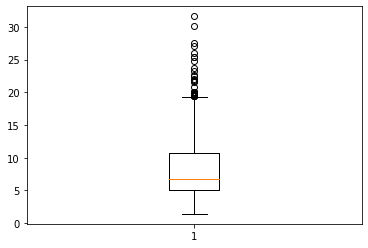

In [36]:
plt.boxplot(df_files['duration']);

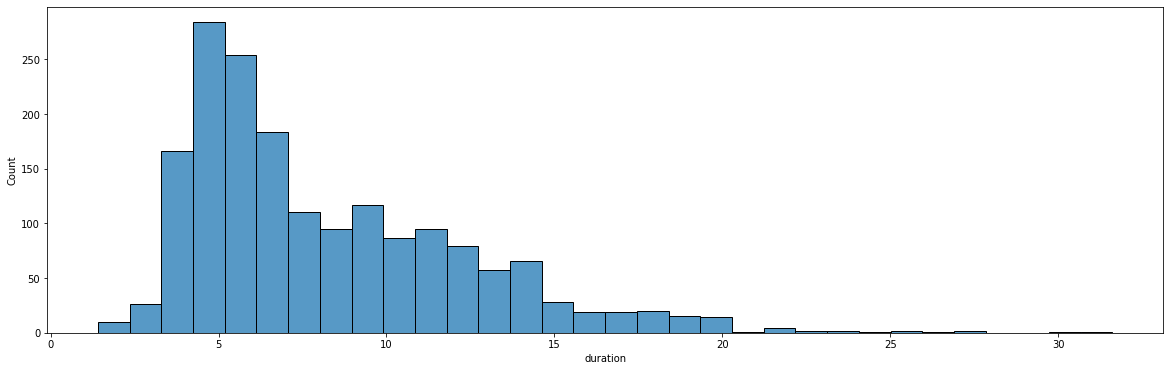

In [43]:
import seaborn as sns
fig = plt.figure(figsize=(20,6))
sns.histplot(df_files['duration']);

In [ ]:
# df_files.drop(df_files[df_files['duration'] < 1].index, axis=0, inplace=True)
# df_files.reset_index(inplace=True)
# df_files.shape

In [44]:
df_files.head()

,Unnamed: 0,id,path,point,model,label,duration,rec_id,n_seg,length,predicted_label,target,Datetime
0,1188,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,chest03,samsung SM-A605FN | 8.0.0,normal,2.944,e70516a491f41f9d_chest03,1,2.433197,True,0,2019-08-14 22:00:00
1,1189,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,chest04,samsung SM-A605FN | 8.0.0,normal,3.584,e70516a491f41f9d_chest04,1,2.957098,True,0,2019-08-14 22:00:00
2,1196,1da9189c64909401,./audio_files/20190815-084903-1da9189c64909401...,chest01,samsung SM-A605FN | 8.0.0,problems,10.240,1da9189c64909401_chest01,1,9.752381,True,1,2019-08-15 08:49:00
3,1197,1da9189c64909401,./audio_files/20190815-084903-1da9189c64909401...,chest02,samsung SM-A605FN | 8.0.0,problems,12.800,1da9189c64909401_chest02,1,12.289161,True,1,2019-08-15 08:49:00
4,1198,1da9189c64909401,./audio_files/20190815-084903-1da9189c64909401...,chest03,samsung SM-A605FN | 8.0.0,problems,12.672,1da9189c64909401_chest03,1,12.161179,True,1,2019-08-15 08:49:00


In [45]:
df_positive = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/positives.csv', header=None)

In [46]:
df_negative = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/negatives.csv', header=None)

In [47]:
df_positive = './audio_files/' +  df_positive[0].str.lstrip('http://lungs.makseq.com/data/service/')


In [48]:
df_negative = './audio_files/' +  df_negative[0].str.lstrip('http://lungs.makseq.com/data/service/')

In [49]:
df_positive

0      ./audio_files/20211101-125147-b5a05864b4f448a1...
1      ./audio_files/20211101-125147-b5a05864b4f448a1...
2      ./audio_files/20211101-125147-b5a05864b4f448a1...
3      ./audio_files/20211029-100738-0657eaa451ac2742...
4      ./audio_files/20211029-100738-0657eaa451ac2742...
                             ...                        
145    ./audio_files/20210915-140850-d594cbe6e2461128...
146    ./audio_files/20210916-115907-e56a0cb1b234b74f...
147    ./audio_files/20210916-115907-e56a0cb1b234b74f...
148    ./audio_files/20210916-115907-e56a0cb1b234b74f...
149    ./audio_files/20210916-115907-e56a0cb1b234b74f...
Name: 0, Length: 150, dtype: object

In [50]:
df_files[df_files['path'].isin(df_positive)]['target'].sum()

146

In [ ]:
#two labels incorrect

In [51]:
df_files.loc[df_files['path'].isin(df_positive), 'target'] = 1

In [52]:
df_files[df_files['path'].isin(df_negative)]['target'].sum()

34

In [ ]:
#34 labels are incorrect

In [53]:
df_files.loc[df_files['path'].isin(df_negative), 'target'] = 0

In [54]:
from os.path import exists

In [55]:
df_files.shape

(1762, 13)

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20210420-114014-e8e1fbb1f6277344-chest02.wav


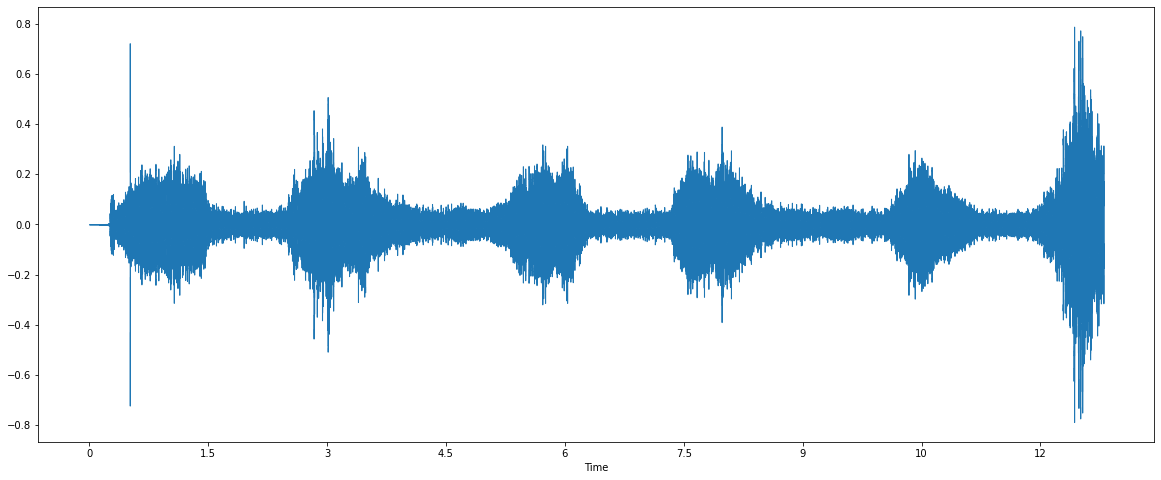

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20190827-145201-21da888c2db0925b-spine03.wav


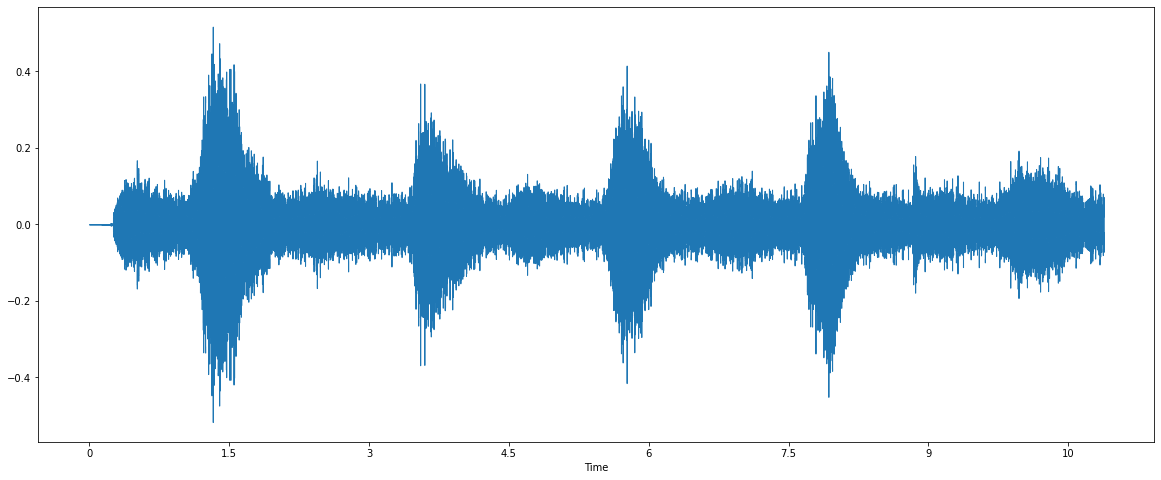

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20210205-104714-94547a049fa0df1f-chest03.wav


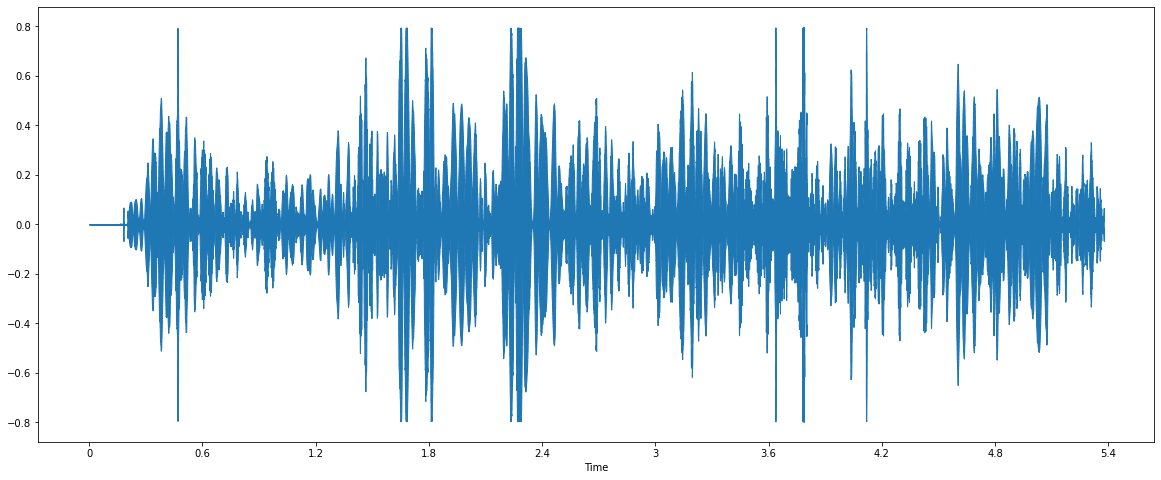

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20211117-133447-817f269cf9d90980-spine02.wav


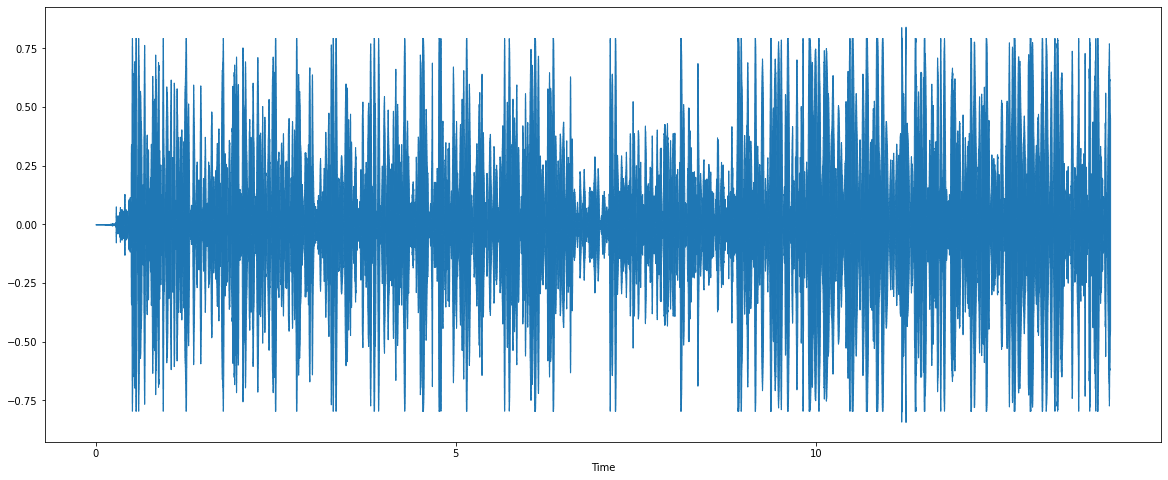

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20210602-153021-d12cb63895b8f572-spine01.wav


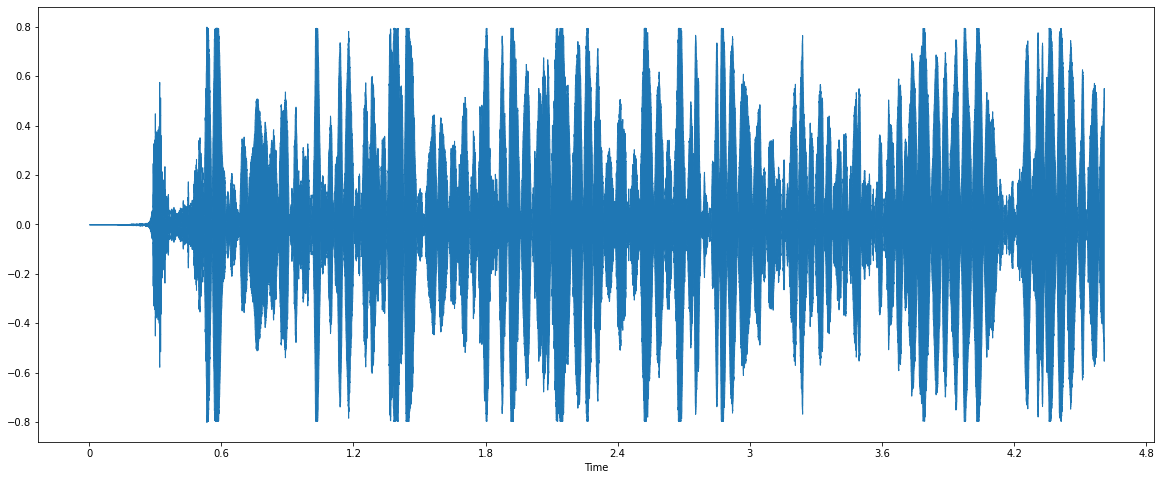

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20210914-103309-7e6d2038a94e58e0-spine03.wav


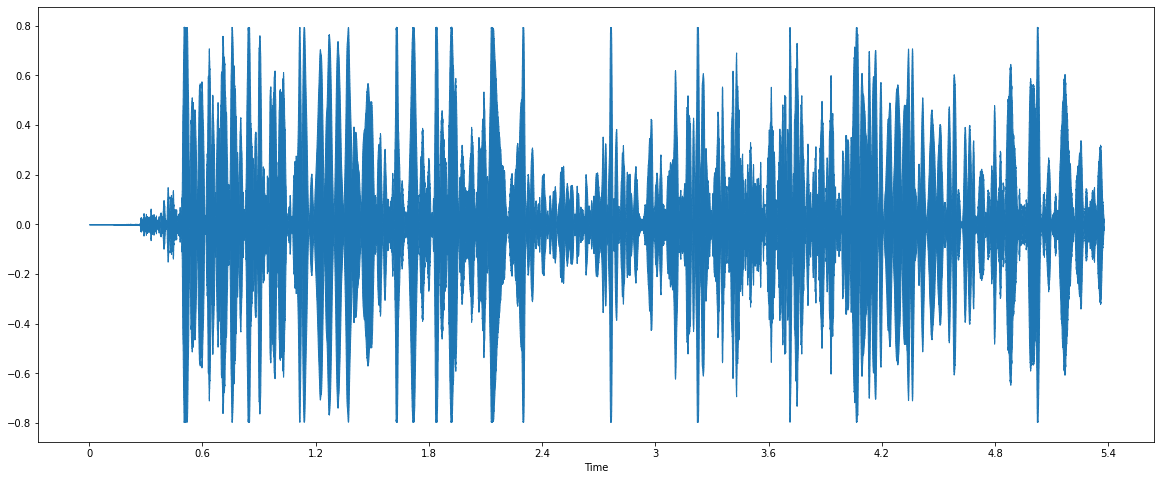

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20211102-111812-341999c6869a5ab2-spine04.wav


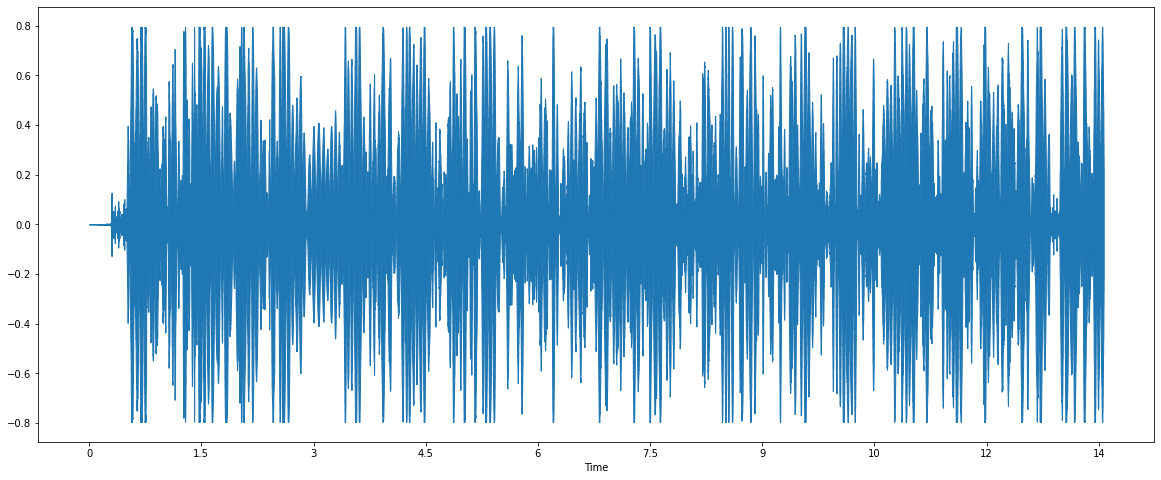

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20211201-110208-9a5488f27ac941de-chest02.wav


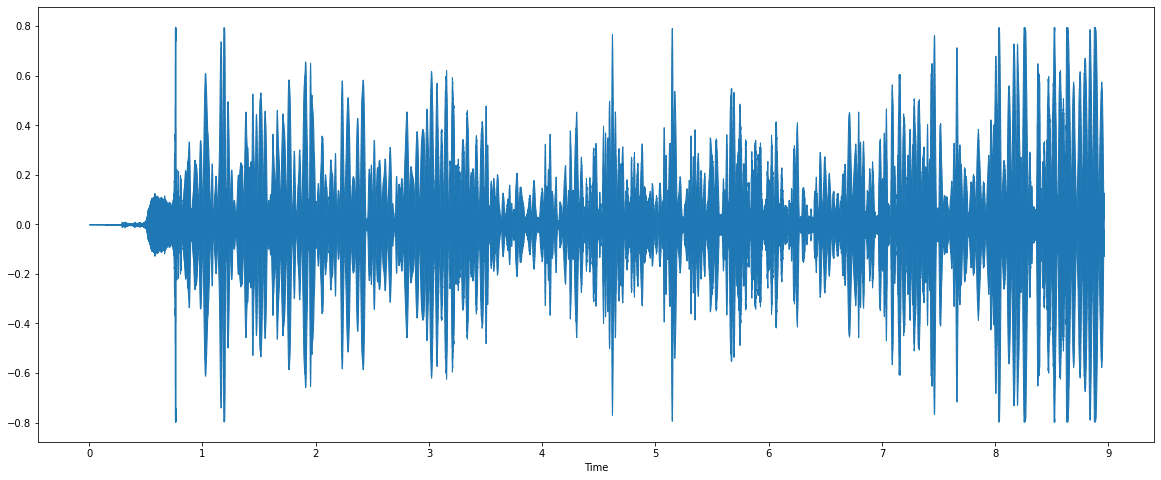

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20210601-123329-201e5e0eb13582ab-spine01.wav


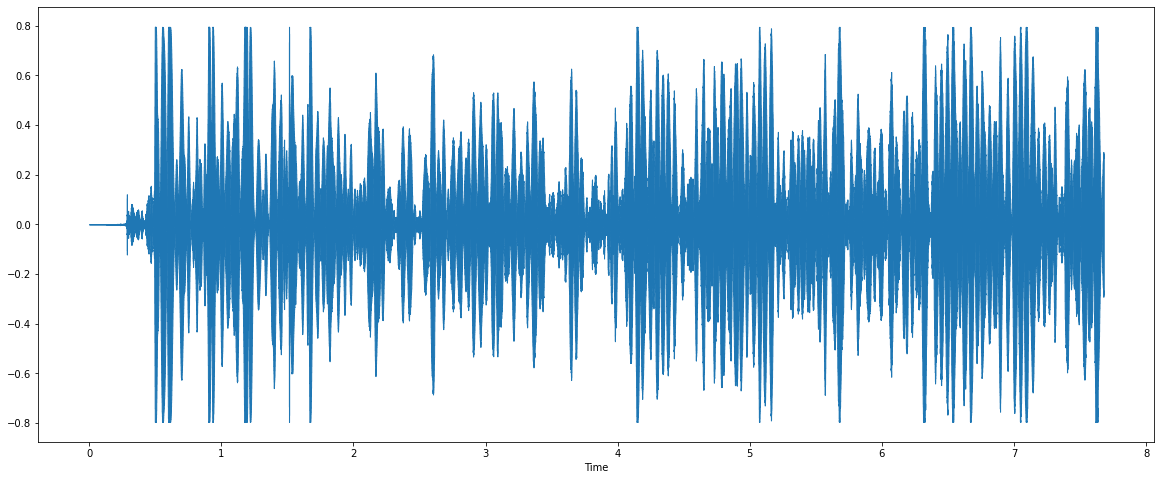

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20210914-110044-ed47ef6bd436003c-chest03.wav


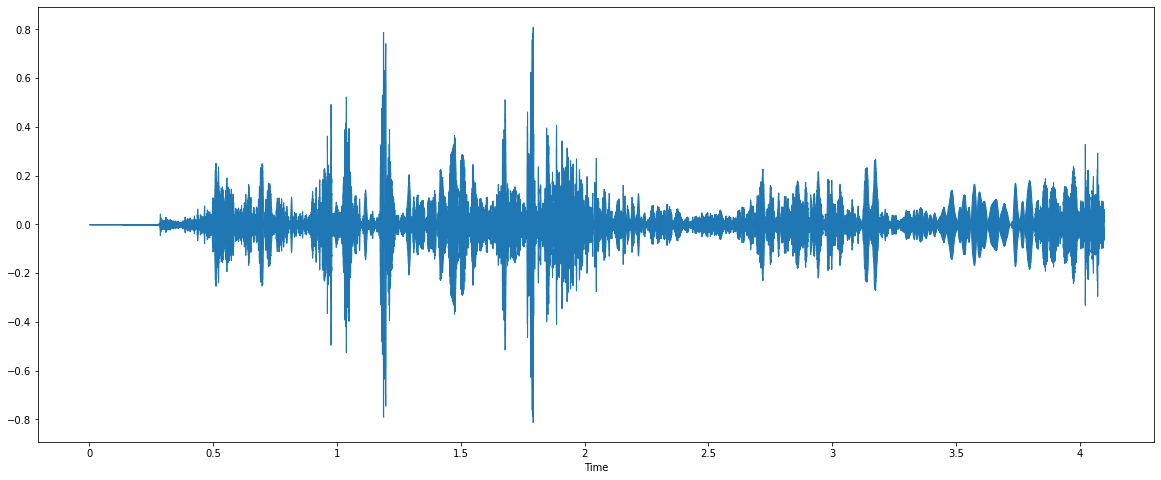

In [56]:
for row in np.random.randint(0, len(df_files['path']), 10):
  path_temp = '/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files' + df_files.loc[row, 'path'].lstrip('.')
  signal_temp,sample_rate_temp = librosa.load(path_temp)
  plt.figure(figsize = (20,8))
  librosa.display.waveshow(signal_temp,sr=sample_rate)
  print(path_temp)
  plt.show();

In [57]:
df_files

,Unnamed: 0,id,path,point,model,label,duration,rec_id,n_seg,length,predicted_label,target,Datetime
0,1188,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,chest03,samsung SM-A605FN | 8.0.0,normal,2.944,e70516a491f41f9d_chest03,1,2.433197,True,0,2019-08-14 22:00:00
1,1189,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,chest04,samsung SM-A605FN | 8.0.0,normal,3.584,e70516a491f41f9d_chest04,1,2.957098,True,0,2019-08-14 22:00:00
2,1196,1da9189c64909401,./audio_files/20190815-084903-1da9189c64909401...,chest01,samsung SM-A605FN | 8.0.0,problems,10.240,1da9189c64909401_chest01,1,9.752381,True,1,2019-08-15 08:49:00
3,1197,1da9189c64909401,./audio_files/20190815-084903-1da9189c64909401...,chest02,samsung SM-A605FN | 8.0.0,problems,12.800,1da9189c64909401_chest02,1,12.289161,True,1,2019-08-15 08:49:00
4,1198,1da9189c64909401,./audio_files/20190815-084903-1da9189c64909401...,chest03,samsung SM-A605FN | 8.0.0,problems,12.672,1da9189c64909401_chest03,1,12.161179,True,1,2019-08-15 08:49:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,3681,42dcdccf5dac3ac3,./audio_files/20211215-195818-42dcdccf5dac3ac3...,spine03,Xiaomi M2003J15SC | 10,normal,18.304,42dcdccf5dac3ac3_spine03,1,18.048617,True,0,2021-12-15 19:58:00
1758,3682,42dcdccf5dac3ac3,./audio_files/20211215-195818-42dcdccf5dac3ac3...,spine01,Xiaomi M2003J15SC | 10,normal,18.944,42dcdccf5dac3ac3_spine01,1,18.665397,True,0,2021-12-15 19:58:00
1759,3683,42dcdccf5dac3ac3,./audio_files/20211215-195818-42dcdccf5dac3ac3...,spine06,Xiaomi M2003J15SC | 10,normal,17.664,42dcdccf5dac3ac3_spine06,12,13.855964,True,0,2021-12-15 19:58:00
1760,3684,42dcdccf5dac3ac3,./audio_files/20211215-195818-42dcdccf5dac3ac3...,spine04,Xiaomi M2003J15SC | 10,normal,18.432,42dcdccf5dac3ac3_spine04,1,18.199819,True,0,2021-12-15 19:58:00


In [ ]:
# df_files.drop(df_files[df_files['duration'] < 1].index, axis=0, inplace=True)
# df_files.reset_index(inplace=True)
# df_files.shape

In [58]:
threshold = 2
zeros = 0
shorts = 0
error_duration = []
errors = 0
short_indexes = []
durations = []
for i, row in tqdm(df_files.iterrows(), total=len(df_files['path'])):
    path = '/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files' + df_files.loc[i]['path'].lstrip('.')
    signal,sample_rate = librosa.load(path)
    if signal.sum() == 0:
      # print('zero  ', path)
      zeros += 1
    else: 
      try:
        if librosa.get_duration(signal, sample_rate) < threshold:
        # print('less than second', path, librosa.get_duration(signal, sample_rate))
          shorts += 1
          short_indexes.append(i)
        durations.append(librosa.get_duration(signal, sample_rate))
      except:
        errors += 1
        error_duration.append(path)


100%|██████████| 1762/1762 [15:33<00:00,  1.89it/s]


In [59]:
shorts, zeros, errors, len(df_files['path'])

(6, 0, 0, 1762)

In [60]:
error_duration

[]

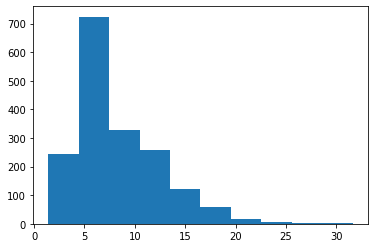

In [61]:
plt.hist(durations);

In [63]:
threshold = 2
delete_index = []
errors = 0

for i, row in tqdm(df_files.iterrows(), total=len(df_files['path'])):
    path = '/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files' + df_files.loc[i]['path'].lstrip('.')
    signal,sample_rate = librosa.load(path)
    if signal.sum() == 0:
      # print('zero  ', path)
      delete_index.append(i)
    else: 
      try:
        if librosa.get_duration(signal, sample_rate) < threshold:
          delete_index.append(i)
      except:
        errors += 1
        delete_index.append(i)

100%|██████████| 1762/1762 [06:38<00:00,  4.42it/s]


In [65]:
len(delete_index)

6

In [66]:
df_files.shape

(1762, 13)

In [67]:
df_files = df_files.drop(delete_index)

In [68]:
df_files.shape

(1756, 13)

In [69]:
features = ['id', 'model', 'Datetime', 'point', 'path']

In [70]:
df_features = df_files[features]

Split into train and test

In [71]:
path_train, path_test, y_train, y_test = train_test_split(df_features, df_files['target'], 
                                                    test_size=0.2 ,random_state=99)

In [72]:
path_train.shape, path_test.shape, y_train.shape, y_test.shape

((1404, 5), (352, 5), (1404,), (352,))

In [73]:
path_train.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/path_train.csv")
y_train.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/y_train.csv")
path_test.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/path_test.csv", index=False)
y_test.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/y_test.csv", index=False)

In [ ]:
path_train.head()

,id,model,Datetime,point,path
1937,7e47c5ae6034a1a3,Xiaomi Redmi Note 9 Pro | 10,2021-10-05 09:56:00,chest04,./audio_files/20211005-095645-7e47c5ae6034a1a3...
2311,64f9c13f97eee760,Xiaomi Redmi Note 9 Pro | 11,2021-11-30 12:13:00,spine06,./audio_files/20211130-121333-64f9c13f97eee760...
1105,201e5e0eb13582ab,Xiaomi Redmi Note 9 Pro | 10,2021-06-01 12:33:00,spine04,./audio_files/20210601-123329-201e5e0eb13582ab...
1533,f465ff10f8dabe78,Xiaomi Redmi Note 9 Pro | 10,2021-07-13 15:26:00,spine01,./audio_files/20210713-152640-f465ff10f8dabe78...
2293,78633fe38950f24b,Xiaomi Redmi Note 9 Pro | 11,2021-11-29 12:48:00,spine05,./audio_files/20211129-124812-78633fe38950f24b...


In [ ]:
y_train.head()

1937    0
2311    0
1105    1
1533    0
2293    1
Name: target, dtype: int64

'/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20190820-082529-b8715e18c465d450-spine05.wav'

Gather all tracks into a dataframe, using the train set of paths to files

In [ ]:
# df_features = pd.DataFrame()
# for i in tqdm(df_files.index):
#     path = '/Users/stanislavnevyazhsky/My Drive/Colab Notebooks/Project/pneumonia_files' + df_files.loc[i]['path'].lstrip('.')
#     track,sample_rate = librosa.load(path)
#     # signal = np.pad(signal, (0, max_length-len(signal), 'constant')
#     df_features = df_features.append(pd.Series(track), ignore_index=True)
#     print(i, path)
  

In [ ]:
# df_target = df_files['target']

In [ ]:
# X_train.shape, y_train.shape, X_test.shape, y_test.shape


In [ ]:
# X_train.fillna(value=0.0, inplace=True)
# X_test.fillna(value=0.0, inplace=True)

In [ ]:
# zeros = pd.DataFrame(0, index=X_train.index, columns=[X_train.columns[-1] + i+1 for i in range(X_test.columns.shape[0])])

